In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("realistic_ocean_climate_dataset.csv")

In [4]:
print(df['Date'].dtype)  # Check the original type

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce invalid dates to NaT

print(df['Date'].dtype)  # Should now be datetime64[ns]


object
datetime64[ns]


In [5]:
print(df[df['Date'].isna()])  

    Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
2    NaT       Caribbean Sea   14.9768   -75.0233     28.86     7.947   
3    NaT  Great Barrier Reef  -18.3152   147.6486     28.97     7.995   
4    NaT           Galápagos   -0.8805   -90.9769     28.60     7.977   
7    NaT             Red Sea   19.9390    38.5104     25.56     8.042   
8    NaT            Maldives    3.2397    73.2293     28.33     8.038   
..   ...                 ...       ...        ...       ...       ...   
493  NaT    Hawaiian Islands   19.9412  -155.6210     28.56     8.083   
494  NaT  Great Barrier Reef  -18.2335   147.8174     27.32     8.005   
497  NaT       Caribbean Sea   15.0430   -75.0194     28.43     8.053   
498  NaT             Red Sea   19.9993    38.4655     27.76     8.137   
499  NaT             Red Sea   20.0407    38.4861     28.08     8.098   

    Bleaching Severity  Species Observed  Marine Heatwave  
2                 High                90            False  
3  

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


d:\sympo project\naan mudhalvan\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


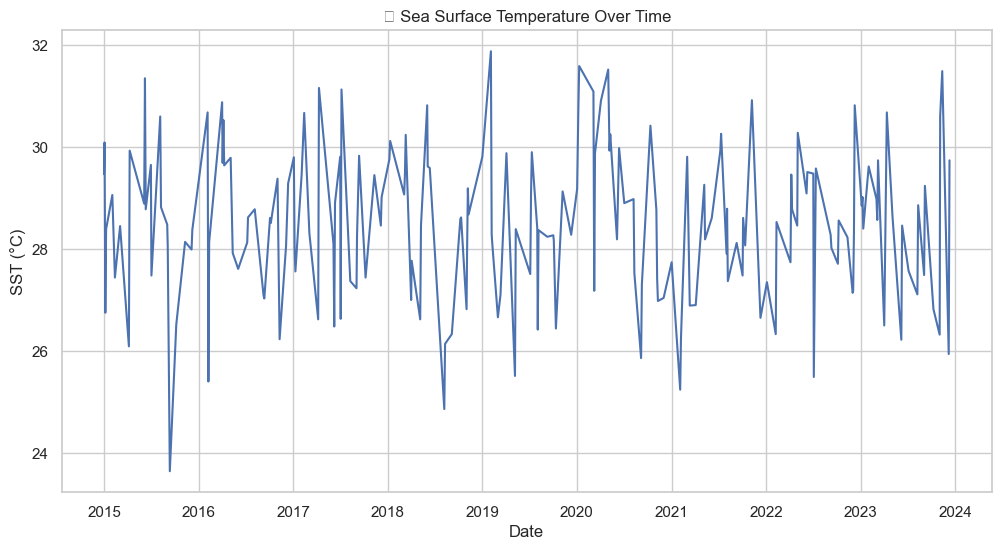

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='SST (°C)', data=df)
plt.title('📈 Sea Surface Temperature Over Time')
plt.ylabel('SST (°C)')
plt.show()

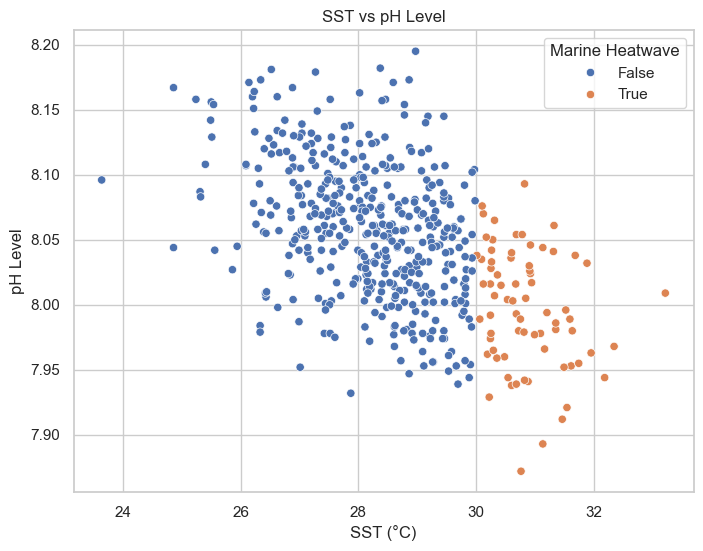

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SST (°C)', y='pH Level', hue='Marine Heatwave')
plt.title('SST vs pH Level')
plt.show()

C:\Users\prane\AppData\Local\Temp\ipykernel_1984\98621303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')


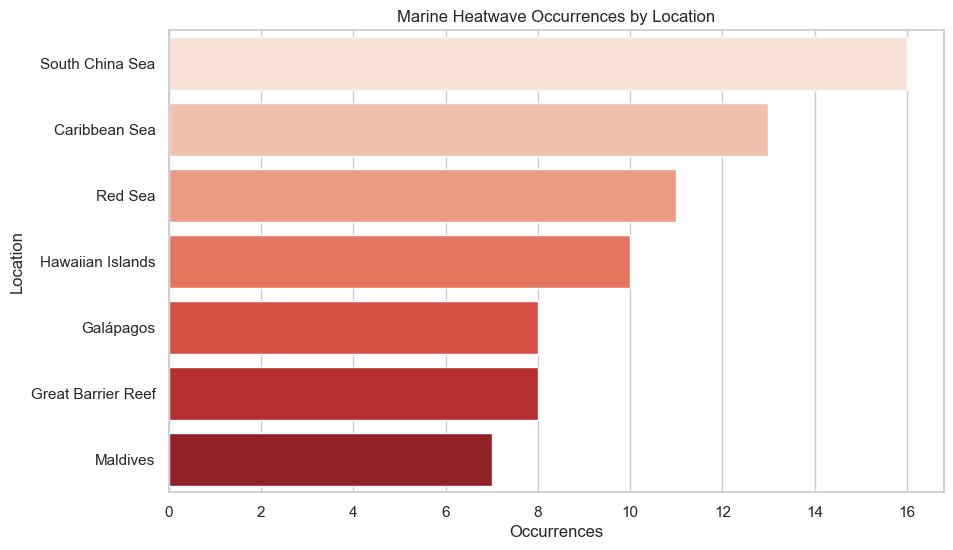

In [9]:
plt.figure(figsize=(10, 6))
heatwave_counts = df[df['Marine Heatwave'] == True]['Location'].value_counts()
sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')
plt.title('Marine Heatwave Occurrences by Location')
plt.xlabel('Occurrences')
plt.show()

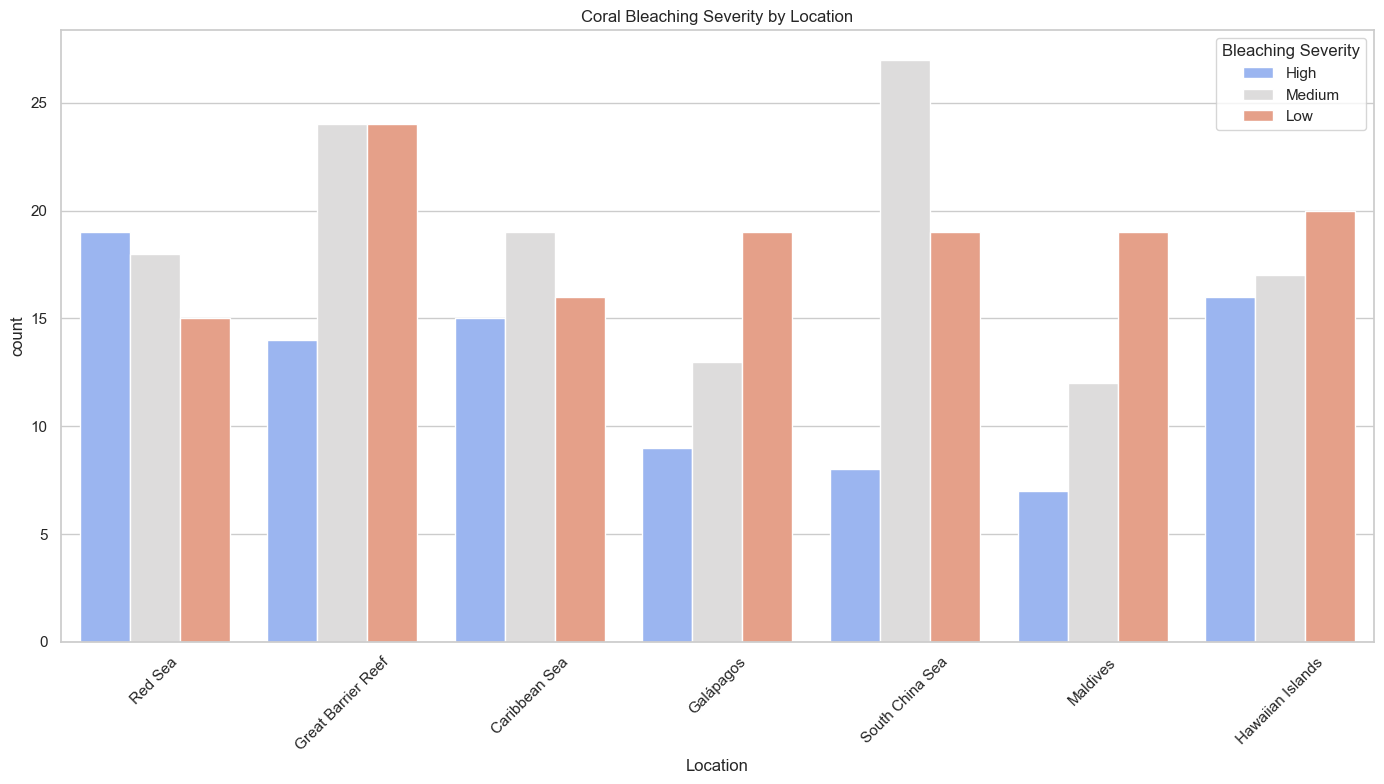

In [10]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Location', hue='Bleaching Severity', palette='coolwarm')
plt.title('Coral Bleaching Severity by Location')
plt.xticks(rotation=45)
plt.legend(title='Bleaching Severity')
plt.tight_layout()
plt.show()

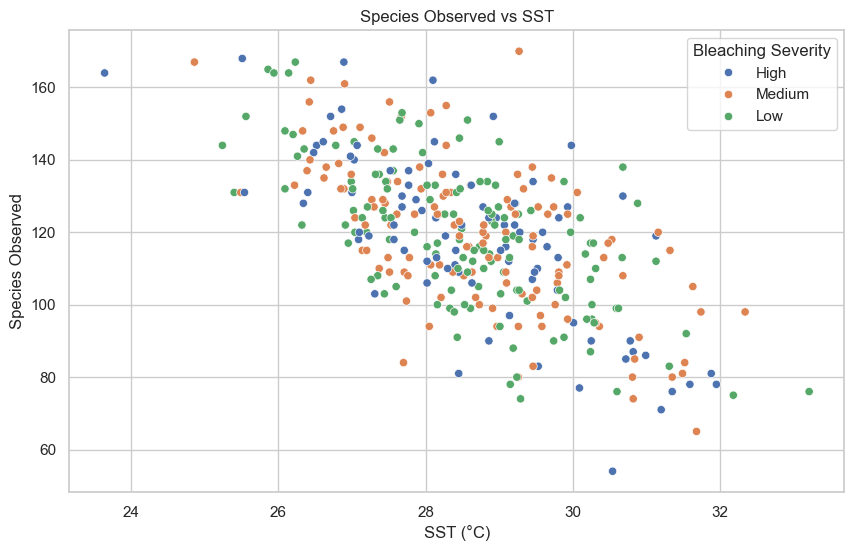

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SST (°C)', y='Species Observed', hue='Bleaching Severity')
plt.title('Species Observed vs SST')
plt.show()

In [12]:
top_sst = df.groupby('Location')['SST (°C)'].mean().sort_values(ascending=False).head(5)
print("📍 Locations with highest avg SST:\n", top_sst)

📍 Locations with highest avg SST:
 Location
South China Sea       28.866986
Caribbean Sea         28.681143
Maldives              28.543333
Great Barrier Reef    28.469195
Hawaiian Islands      28.424085
Name: SST (°C), dtype: float64


In [13]:
print("""
Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.
""")


Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.

